# Effect of Interpolation Scheme on the Implied Forward Curve

In [1]:
import numpy as np
import pandas as pd
import math, os, time, tqdm
import datetime as dt
import matplotlib.pyplot as plt

market_quotes = pd.read_csv('rates_20240710.csv')
market_quotes['date'] = pd.to_datetime(market_quotes['date'], format = '%Y-%m-%d')
#market_quotes.drop(index=market_quotes.index[:4301], axis=0, inplace=True) #Drop all dates with Nan-values, starting at 2020-11-02
#market_quotes = market_quotes.reset_index(drop=True) 

market_quotes.set_index('date', inplace = True)

sonia_tenors = ['sonia1m', 'sonia3m', 'sonia6m', 'sonia1y', 'sonia2y', 'sonia3y', 'sonia4y', 'sonia5y', 'sonia7y', 'sonia10y', 'sonia30y']
estr_tenors = ['estr1m', 'estr3m', 'estr6m', 'estr1y', 'estr2y', 'estr3y', 'estr4y', 'estr5y', 'estr7y', 'estr10y', 'estr30y']
sofr_tenors = ['sofr1m', 'sofr3m', 'sofr6m', 'sofr1y', 'sofr2y', 'sofr3y', 'sofr4y', 'sofr5y', 'sofr7y', 'sofr10y', 'sofr30y']
euribor_tenors = ['eur1m', 'eur3m', 'eur6m', 'eur1y', 'eur2y', 'eur3y', 'eur4y', 'eur5y', 'eur7y', 'eur10y', 'eur30y']

sonia = market_quotes[sonia_tenors]
estr = market_quotes[estr_tenors]
sofr = market_quotes[sofr_tenors]
euribor = market_quotes[euribor_tenors]

<Axes: title={'center': 'ESTR'}, xlabel='date'>

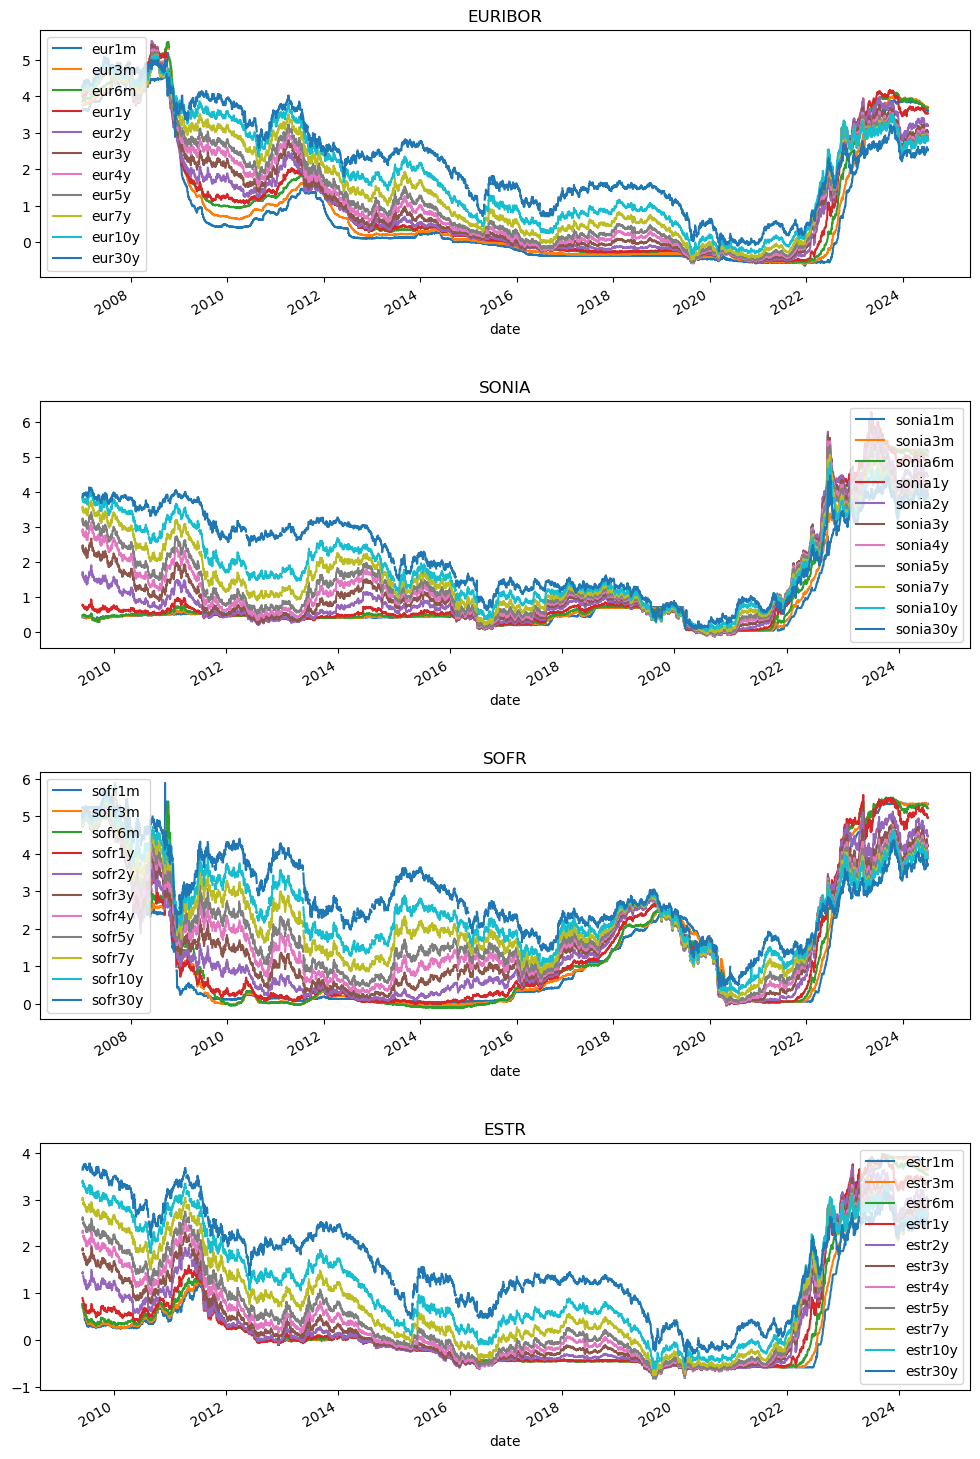

In [2]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize = [12, 20])

plt.subplots_adjust(hspace = 0.5)

euribor.plot(ax=axes[0], title = 'EURIBOR', rot = 30)
sonia.plot(ax=axes[1], title = 'SONIA')
sofr.plot(ax=axes[2], title = 'SOFR')
estr.plot(ax=axes[3], title = 'ESTR')

Observing values past 2020-11-02, for which there are rates for all intruments. 

In [3]:
market_quotes = pd.read_csv('rates_20240710.csv')
market_quotes['date'] = pd.to_datetime(market_quotes['date'], format = '%Y-%m-%d')

#Drop all dates with Nan-values, starting at 2020-11-02
market_quotes.drop(index=market_quotes.index[:4301], axis=0, inplace=True) 
#market_quotes = market_quotes.reset_index(drop=True) 


market_quotes.set_index('date', inplace = True)


market_quotes.head()

,sonia1m,sonia3m,sonia6m,sonia1y,sonia2y,sonia3y,sonia4y,sonia5y,sonia7y,sonia10y,...,eur3m,eur6m,eur1y,eur2y,eur3y,eur4y,eur5y,eur7y,eur10y,eur30y
date,,,,,,,,,,,,,,,,,,,,,
2020-11-02,0.052,0.045,0.022,-0.017,-0.055,-0.058,-0.040,-0.013,0.057,0.166,...,-0.520,-0.513,-0.5290,-0.54400,-0.53925,-0.51890,-0.48900,-0.40990,-0.27070,-0.04230
2020-11-03,0.051,0.046,0.024,-0.014,-0.045,-0.043,-0.018,0.018,0.099,0.218,...,-0.520,-0.513,-0.5275,-0.53925,-0.53300,-0.50875,-0.47640,-0.39475,-0.25400,-0.02530
2020-11-04,0.050,0.044,0.022,-0.017,-0.058,-0.064,-0.046,-0.019,0.049,0.155,...,-0.517,-0.515,-0.5278,-0.54090,-0.53550,-0.51450,-0.48415,-0.40750,-0.27155,-0.04110
2020-11-05,0.053,0.048,0.029,-0.010,-0.049,-0.054,-0.033,-0.003,0.068,0.177,...,-0.517,-0.511,-0.5256,-0.53930,-0.53435,-0.51430,-0.48600,-0.41070,-0.27530,-0.03625
2020-11-06,0.053,0.048,0.030,-0.007,-0.043,-0.044,-0.020,0.014,0.094,0.210,...,-0.513,-0.512,-0.5273,-0.54115,-0.53625,-0.51400,-0.48305,-0.40455,-0.26570,-0.01500


<Axes: title={'center': 'ESTR'}, xlabel='date'>

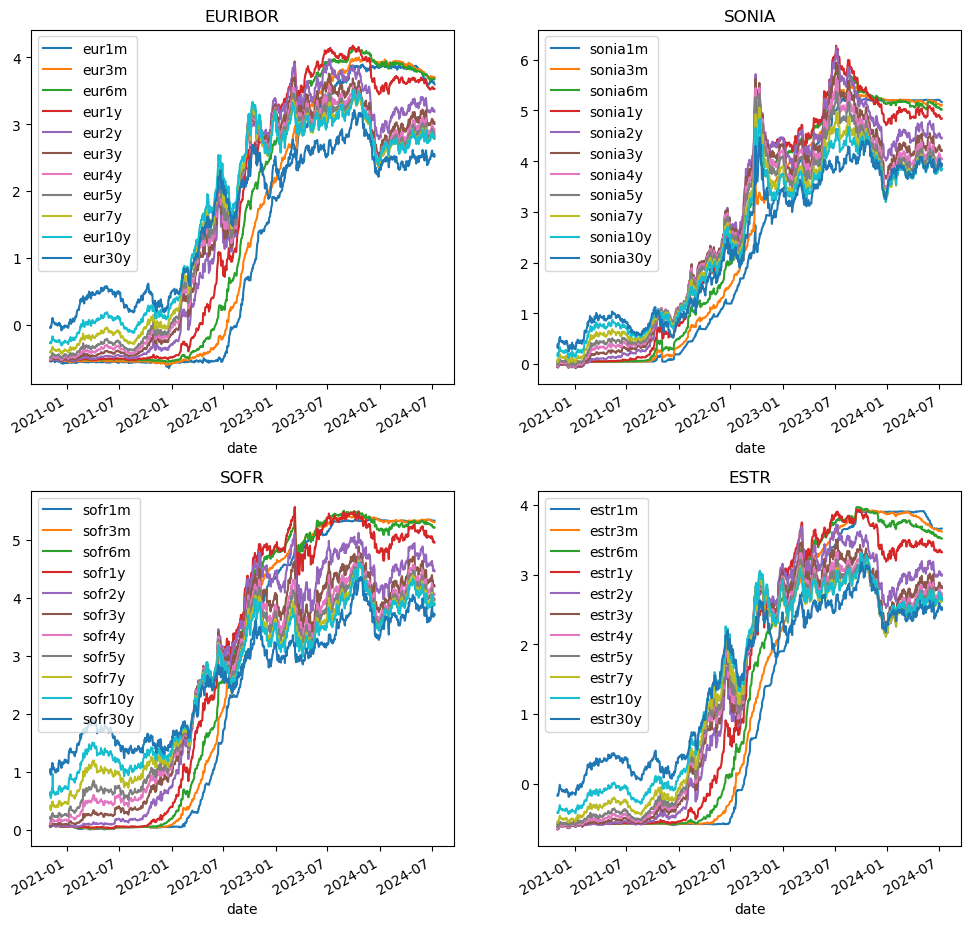

In [4]:
sonia = market_quotes[sonia_tenors]
estr = market_quotes[estr_tenors]
sofr = market_quotes[sofr_tenors]
euribor = market_quotes[euribor_tenors]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = [12, 12])

plt.subplots_adjust(hspace = 0.3)

euribor.plot(ax=axes[0,0], title = 'EURIBOR', rot = 30)
sonia.plot(ax=axes[0,1], title = 'SONIA')
sofr.plot(ax=axes[1,0], title = 'SOFR')
estr.plot(ax=axes[1,1], title = 'ESTR')

In [5]:
spreads = pd.read_csv('XCCYspreads.csv')
spreads['date'] = pd.to_datetime(spreads['Date'], format = '%Y-%m-%d')

spreads.set_index('Date', inplace = True)

spreads.head()

,GBP_EURXCCYOIS_1Y,GBP_EURXCCYOIS_2Y,GBP_EURXCCYOIS_3Y,GBP_EURXCCYOIS_4Y,GBP_EURXCCYOIS_5Y,GBP_EURXCCYOIS_6Y,GBP_EURXCCYOIS_7Y,GBP_EURXCCYOIS_8Y,GBP_EURXCCYOIS_9Y,GBP_EURXCCYOIS_10Y,GBP_EURXCCYOIS_15Y,GBP_EURXCCYOIS_20Y,GBP_EURXCCYOIS_25Y,GBP_EURXCCYOIS_30Y,GBP_EURXCCYOIS_40Y,date
Date,,,,,,,,,,,,,,,,
2017-12-29,17.00,18.88,22.00,24.06,25.94,28.00,29.88,31.25,31.50,32.00,24.75,17.25,15.000,14.75,21.375,2017-12-29
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01
2018-01-02,18.50,18.44,21.50,23.45,25.45,28.00,29.38,31.37,31.63,31.25,26.00,16.75,14.500,14.00,21.125,2018-01-02
2018-01-03,17.94,19.06,21.75,23.59,25.59,27.38,30.00,30.75,31.13,32.13,25.00,17.50,15.250,14.50,22.000,2018-01-03
2018-01-04,20.88,21.50,22.00,24.23,26.35,27.79,30.50,31.50,32.00,33.00,25.81,18.75,16.375,16.50,23.375,2018-01-04


### Assume Dataset are Zero Rates

From the observation of the Dataset available, I choose to assume (perhaps wrongly) that the rates quoted are $\textbf{ZERO/SPOT-Rates}$, analogous to Bloomberg Curve-Construction $\verb|ICVS| \rightarrow \verb|CURVES|\rightarrow \verb|SWPM|$, which are calculated from the Market Rates of the corresponding Maturities. 

If instead the Dataset are Market rates corresponding to the Forward ZCB price, they need to be converted to Zero-Rates. The Bloomberg Conventions of converting Money-Market Rates $f_t$ to Zero Rates $z_t$ used for calculating Discount Factors is as such:

$$z_t = -\dfrac{1}{t} \times \ln \left( \dfrac{1}{1 + f_t \times t} \right)$$

with $t$ being the year-fraction corresponding to the appropriate day-count convention.

### Bootstrapping with Piecewise-Constant Rates

Assume contract length $t_n = 40y$ from a specific spot-date $t_0$, with $\Delta t = \frac{1}{4}$ (corresponding to the 3M rate) and Discount Factors $P(t_0, t_i) = P(t_i)$. For a set of Tenors $\tau = \left\{\tau_1 = 1m, \tau_2 = 3m, \tau_3 = 6m, \tau_4 = 1y, \tau_5 = 2y, \tau_6 = 3y, \tau_7 = 4y, \tau_8 = 5y, \tau_9 = 7y, \tau_{10} = 10y, \tau_{11} = 30y \right\}$, there are corresponding rates $r_{k-1}$ for each $\tau_k$.  

If the risk-free rates are taken to be Piecewise-Constant (Forward for IBORs) between Tenor-period intervals (i.e. $r_{k-1}$ is constant for interval $\left[\tau_{k-1}, \tau_{k}\right]$), there is a recursive relationship of Discount Factors that can be interpolated at quarterly intervals 

$$P(\tau_{k-1} + i \; \Delta t ) = P(\tau_{k-1})^{1 - \frac{i}{J(k)}} \times P(\tau_{k})^{\frac{i}{J(k)}} $$

with $J(K) = 4(\tau_k - \tau_{k-1})$ be the number of quaters between two consecutive maturities. 

Note: since EURIBOR foward-looking, we assume the rates $r_{k-1}$ are constant AFTER Tenor time $\tau_{k-1} = t_i$ UP TO AND INCLUDING $\tau_k = t_i + J(k) \times \Delta t$. Observing the dataset used, I also choose to assume the same for (Term) SOFR. Also, valid curves are constructed with non-negative Zero-Rates.  

C:\Users\Chauv\AppData\Local\Temp\ipykernel_17236\1535287539.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


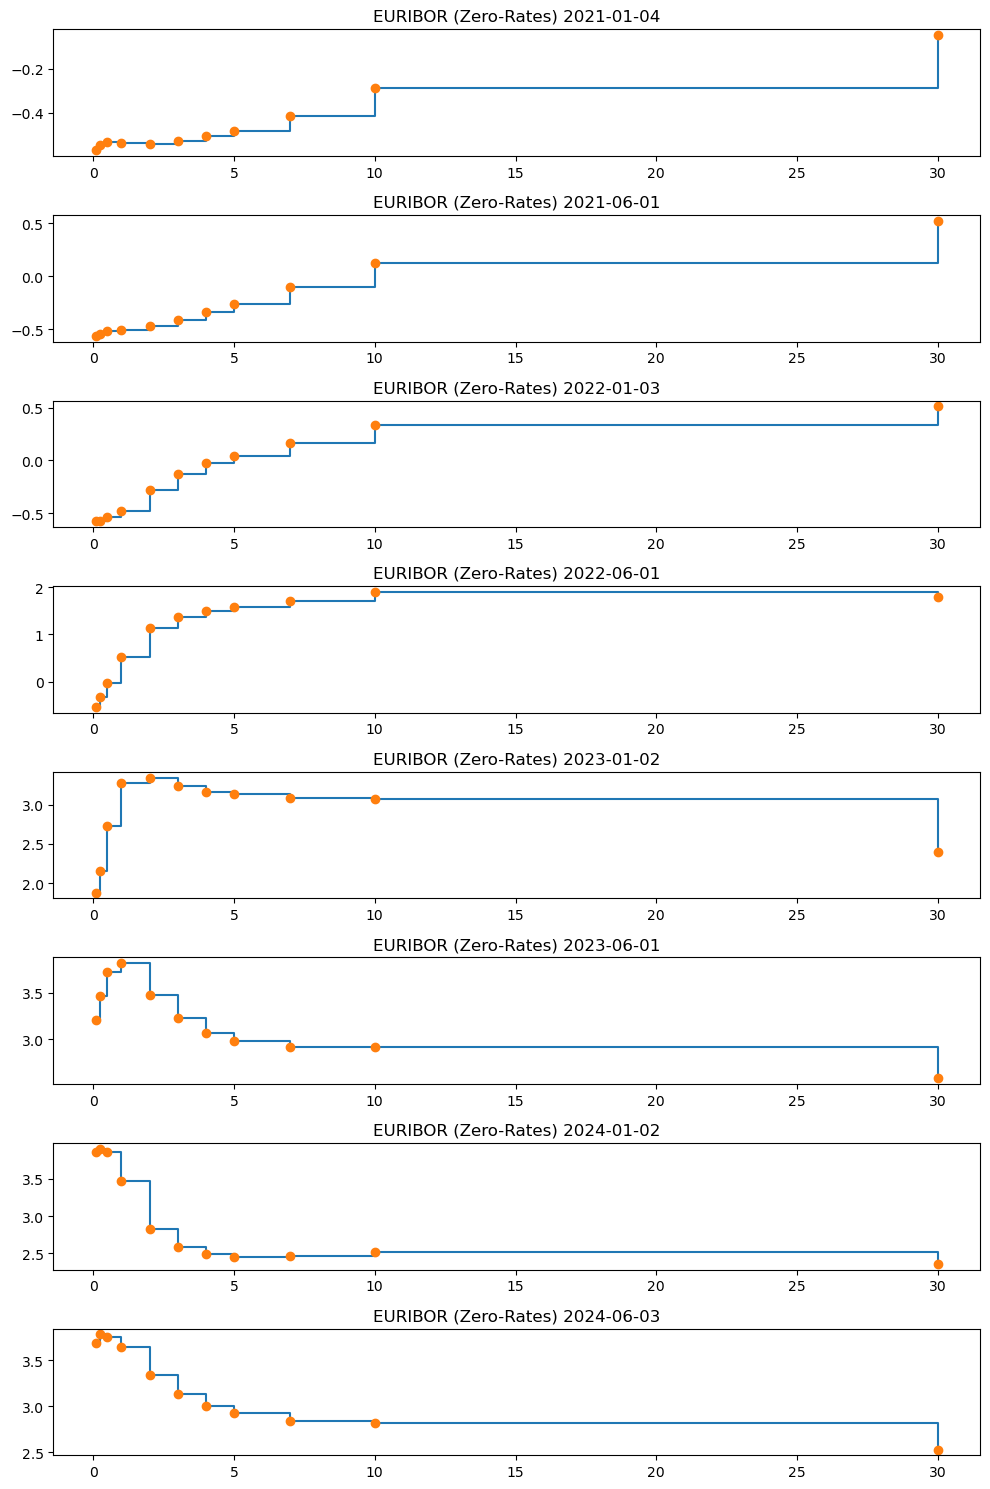

In [6]:
spot_t0 = ['2021-01-04', '2021-06-01', '2022-01-03', '2022-06-01',
           '2023-01-02', '2023-06-01', '2024-01-02', '2024-06-03']
           
df = euribor.loc[spot_t0]

eur_rates = df.to_numpy()
        
tenor = [30/360, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = [10,15])
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration


for i in range(8):
    #where = 'post' for forward looking IBOR
    #where = 'pre' for backward looking Overnight RFRs
    axes[i].step(tenor, eur_rates[i], where = 'post') 
    axes[i].plot(tenor, eur_rates[i], 'o')
    axes[i].set_title(f'EURIBOR (Zero-Rates) {spot_t0[i]}')

fig.tight_layout()
fig.show()

In [7]:
spot_t0 = ['2021-01-04', '2021-06-01', '2022-01-03', '2022-06-01',
           '2023-01-02', '2023-06-01', '2024-01-02', '2024-06-03']
           
df = euribor.loc[spot_t0]

eur_rates = df.to_numpy()
        
zero_rates = eur_rates[-1] / 100
print(f'The EURIBOR Zero-Rates for Spot-Date {spot_t0[-1]} are {zero_rates}')
#print(zero_rates.shape)
tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])

#Extend zero rates and padding intervals to periods
t_max = 31
zero_rates = np.insert(zero_rates, 0, zero_rates[0])
tenor = np.insert(tenor,0,0)

zero_rates = np.insert(zero_rates, len(zero_rates), zero_rates[-1])
tenor = np.insert(tenor,len(tenor),t_max)

The EURIBOR Zero-Rates for Spot-Date 2024-06-03 are [0.0369    0.03782   0.03755   0.0364935 0.0333625 0.031312  0.0300455
 0.029226  0.028412  0.028164  0.0252835]


3101 3101


Text(0.5, 1.0, 'Piecewise-Constant EURIBOR Zero-Rates for 2024-06-03')

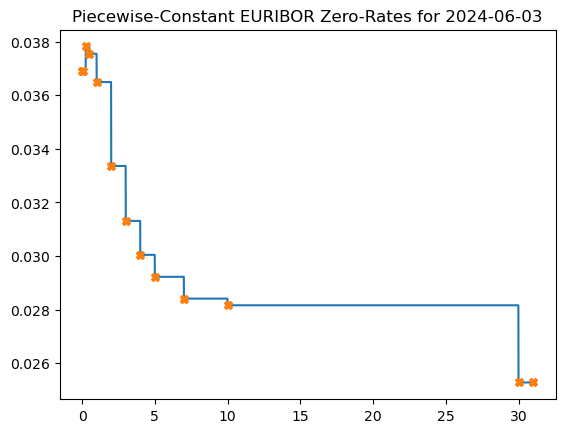

In [8]:
def piecewise_constant_interpolation(x_values, y_values, step=0.01, method='after'):
    
    # Create the new x-values array with the specified step
    x_min = min(x_values)
    x_max = max(x_values)
    new_x_values = np.arange(x_min, x_max + step, step)
    
    interpolated_y_values = []

    for x in new_x_values:
        if method == 'after':
            for i in range(len(x_values) - 1):
                if x_values[i] <= x < x_values[i + 1]:
                    interpolated_y_values.append(y_values[i])
                    break
            else:
                # If x is exactly the last element of the x_values array
                if x == x_values[-1]:
                    interpolated_y_values.append(y_values[-1])
        elif method == 'before':
            for i in range(len(x_values) - 1):
                if x_values[i] < x <= x_values[i + 1]:
                    interpolated_y_values.append(y_values[i + 1])
                    break
            else:
                # If x is exactly the first element of the x_values array
                if x == x_values[0]:
                    interpolated_y_values.append(y_values[0])

    return new_x_values, interpolated_y_values

x, y = piecewise_constant_interpolation(tenor, zero_rates)

print(len(x), len(y))

plt.plot(x,y)
plt.plot(tenor, zero_rates, 'X')
plt.title(f'Piecewise-Constant EURIBOR Zero-Rates for {spot_t0[-1]}')

### Forward Rates

Given the implied expected future Risk-Free Rates (assumed from Zero-Rates), the $\textbf{EXPECTED/IMPLIED}$ Forward Rate for future period $\left[t_{i-1}, t_{i}\right]$ under the Forward Measure is calculated as 
$$\mathbb{E}^{\mathcal{T}_i}\left[f_{\Delta t_i} | \bf{z} \right] = f(t_{i-1}, t_{i}) = \left[ \dfrac{(1 + z(t_i))^{t_i}}{(1 + z(t_{i-1}))^{t_{i-1}}} \right]^{\frac{1}{\Delta t_i}} - 1$$ 

where $z(t_i)$ is the quoted Zero-Rate for maturity at $t_i$ and $\Delta t_i = t_{i} - t_{i-1}$. This is follows from the argument 
$$(1 + z(t_{i-1}))^{t_{i-1}}\times(1 + f(t_{i-1}, t_{i}))^{\Delta t} = (1 + z(t_i))^{t_i} = (1 + z(t_i))^{t_{i-1}+\Delta t}$$

Alternate computations for the Forward Rate are as follows:

1. Simply-Compounding Forward Rate: 

$f(t_0, t_{i-1}, t_{i}) = \dfrac{1}{\Delta t_i} \left[ \dfrac{1 + t_i \times z(t_i)}{1 + t_{i-1} \times z(t_{i-1})} - 1 \right]$ 

2. Simply-Compounding Forward Rate from continuous DF $P(t) = e^{-z_t \times t}$: 

$f(t_0, t_{i-1}, t_{i}) = \dfrac{1}{\Delta t_i} \left[ e^{t_i \times z(t_i) -  t_{i-1} \times z(t_{i-1})} - 1 \right]$ 

For 1. and 2. the Forward Rates are derived from respective Discount Factors $f(t_{i-1}, t_{i}) = \dfrac{1}{\Delta t}\left[\dfrac{P(t_{i})}{P(t_{i-1})} -1 \right]$. Market IBOR rates quoted are calculated using this form. 

3. (Calypso document, page 29) 
Continuously-Compounding $\textbf{Fair}$ Forward Rate: 

$f(t_{i-1}, t_{i}) = \dfrac{t_i \times z(t_i) -  t_{i-1} \times z(t_{i-1})}{\Delta t_i}$ from $e^{t_{i-1} \times z(t_{i-1})} \times e^{f(t_{i-1}, t_{i}) \times \Delta t_i } = e^{t_{i} \times z(t_{i})}$

for spot-date $t_0 = 0$ and $\Delta t_i = t_{i} - t_{i-1}$. 


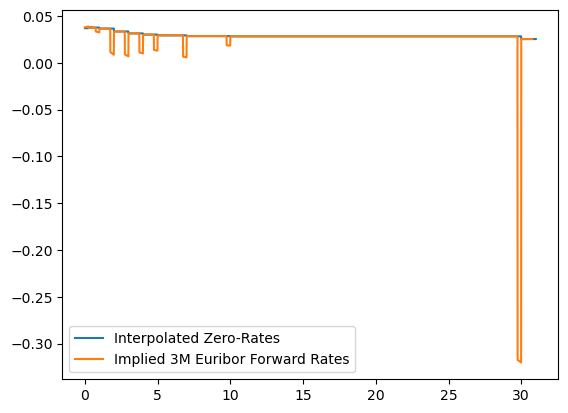

In [9]:
#Calculate Implied Forward Rate as per Calypso, formula no. 3
def forward_rate(rates, time, dt, step = 0.01):

    n = len(rates)
    forwards = np.zeros(int(n - (dt / step)))    
    
    for i in range(len(forwards)):
        
        z2 = rates[i + int(dt / step)]
        t2 = time[i + int(dt / step)]
        
        z1 = rates[i]
        t1 = time[i]        
        
        forwards[i] = (t2 * z2 - t1 * z1) / dt
        
    return forwards

fr = forward_rate(y, x, 0.25) #3m EURIBOR Rate

plt.plot(x,y, label = 'Interpolated Zero-Rates')
#plt.plot(tenor, zero_rates, 'X')
dt = 0.25
step = 0.01
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.legend()

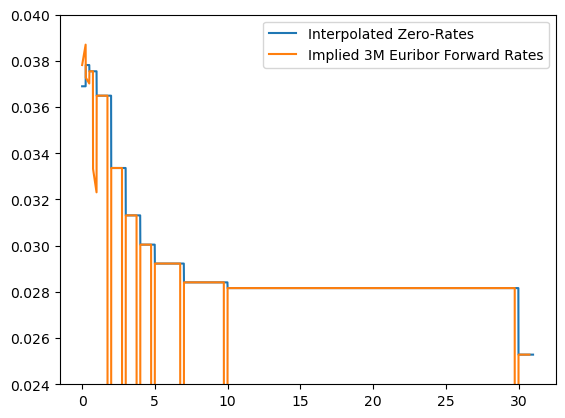

In [10]:
plt.plot(x,y, label = 'Interpolated Zero-Rates')
#plt.plot(tenor, zero_rates, 'X')
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.ylim(0.024, 0.04)
plt.legend()

Depending on the calculation used, the Implied Forward Rates from Zeroes might exhibit different properties. Generally, when considering the Interpolation Scheme of Zero-Rates, we want the Instantaneous Forward Rate to be Positive, Continuous, $\textbf{Stable}$ (low perturbation relative to change in Yields/ZeroRates), and $\textbf{Local}$ (low perturbation relative to shift in Tenors)

### Bootstrapping with Linear Interpolation

3101 3101


Text(0.5, 1.0, 'Linearly-Interpolated EURIBOR Zero-Rates for 2024-06-03')

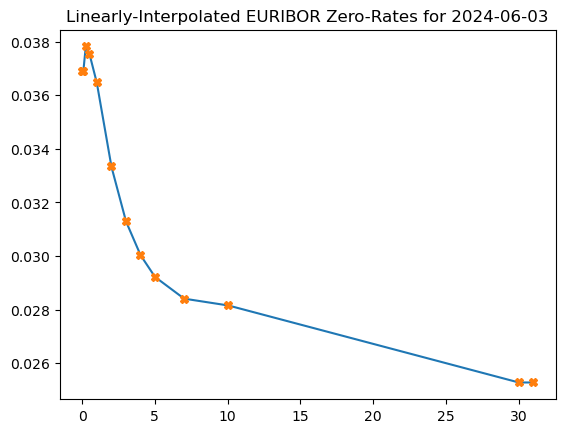

In [11]:
def linear_interpolation(x_values, y_values, step=0.01):
    # Create the new x-values array with the specified step
    x_min = min(x_values)
    x_max = max(x_values)
    new_x_values = np.arange(x_min, x_max + step, step)
    
    interpolated_y_values = []

    for x in new_x_values:
        # Find the interval [x_i, x_i+1] such that x_i <= x < x_i+1
        for i in range(len(x_values) - 1):
            if x_values[i] <= x < x_values[i + 1]:
                # Linear interpolation formula
                x_i = x_values[i]
                x_i1 = x_values[i + 1]
                y_i = y_values[i]
                y_i1 = y_values[i + 1]
                
                y = y_i + (y_i1 - y_i) * (x - x_i) / (x_i1 - x_i)
                interpolated_y_values.append(y)
                break
        else:
            # If x is exactly the last element of the x_values array
            if x == x_values[-1]:
                interpolated_y_values.append(y_values[-1])
    
    return new_x_values, interpolated_y_values

x, y = linear_interpolation(tenor, zero_rates)

print(len(x), len(y))

plt.plot(x,y)
plt.plot(tenor, zero_rates, 'X')
plt.title(f'Linearly-Interpolated EURIBOR Zero-Rates for {spot_t0[-1]}')

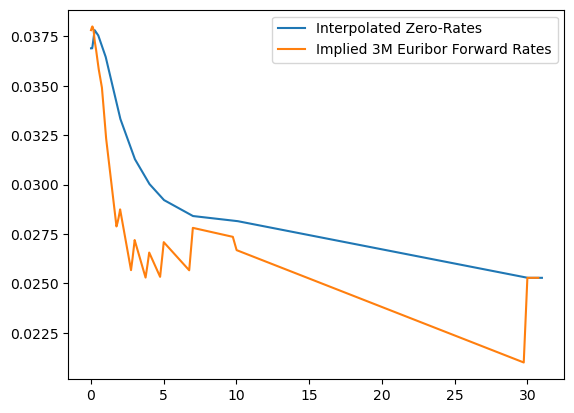

In [12]:
fr = forward_rate(y, x, 0.25) #3m EURIBOR Rate

plt.plot(x,y, label = 'Interpolated Zero-Rates')
#plt.plot(tenor, zero_rates, 'X')
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.legend()

### Bootstrapping with Natural Cubic Splines Interpolation

Text(0.5, 1.0, 'Splines-Interpolated EURIBOR Zero-Rates for 2024-06-03')

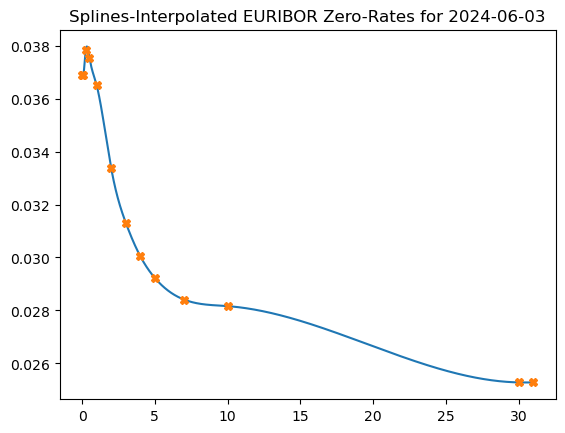

In [13]:
x_values = tenor
y_values = zero_rates

def natural_cubic_spline_interpolation(x_values, y_values, step=0.01):
    n = len(x_values) - 1
    h = np.diff(x_values)
    alpha = np.zeros(n)
    
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y_values[i + 1] - y_values[i]) - (3/h[i - 1]) * (y_values[i] - y_values[i - 1])
    
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    
    for i in range(1, n):
        l[i] = 2 * (x_values[i + 1] - x_values[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
    
    l[n] = 1
    z[n] = 0
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)
    
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y_values[j + 1] - y_values[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
    
    new_x_values = np.arange(min(x_values), max(x_values) + step, step)
    interpolated_y_values = []
    
    for x in new_x_values:
        for i in range(n):
            if x_values[i] <= x <= x_values[i + 1]:
                delta_x = x - x_values[i]
                y = y_values[i] + b[i] * delta_x + c[i] * delta_x**2 + d[i] * delta_x**3
                interpolated_y_values.append(y)
                break
                
    #Add additional last value to make dimensions match
    #interpolated_y_values.append(interpolated_y_values[-1]) 
    
    return new_x_values, interpolated_y_values

x, y = natural_cubic_spline_interpolation(x_values, y_values)
plt.plot(x,y)
plt.plot(tenor, zero_rates, 'X')
plt.title(f'Splines-Interpolated EURIBOR Zero-Rates for {spot_t0[-1]}')

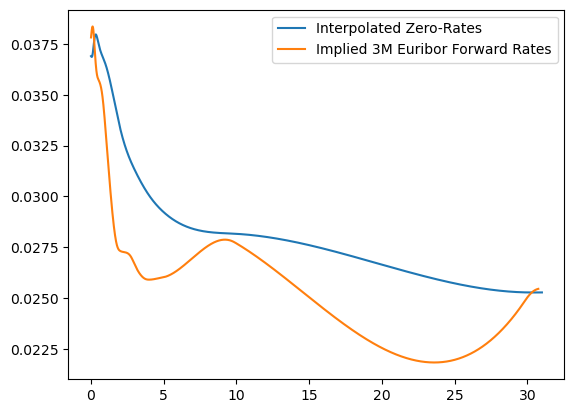

In [14]:
fr = forward_rate(y, x, 0.25) #3m EURIBOR Rate

plt.plot(x,y, label = 'Interpolated Zero-Rates')
#plt.plot(tenor, zero_rates, 'X')
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.legend()

### Instantaneous Forward Rate

The Discount Factors can be defined by the following equivalent formulas: 

- $P(t,T) = \lim_{n \rightarrow \infty} e^{-\sum^{n}_{i} f(t+(i-1) \Delta t, t+(i) \Delta t)} = e^{-\int^{T}_t \; f_s \; ds }$ where $f_s$ is the $\textbf{Instantaneous Forward Rate}$ at time $s$.

- $P(t, T) = e^{-r \; (T-t)}$ for constant Risk-Free Rate $r$ within time interval $\left[t, T\right]$.

Equating the expressions, we are able to derive the formula for the Instantaneous Forward Rate at time $\tau$ given a (assumed to be Risk-Free) Zero-Rate:

$$f(\tau) = \dfrac{\partial}{\partial \tau}(\tau \times r(\tau)) = r(\tau) + \tau \times r'(\tau)$$

Note that the nature of numerically implementing Piecewise-Constant and Linearly Interpolating Rates introduces discontinuities between discrete steps at Tenor points, and hence we have to stipulate 1st-order differentiability at these points. 

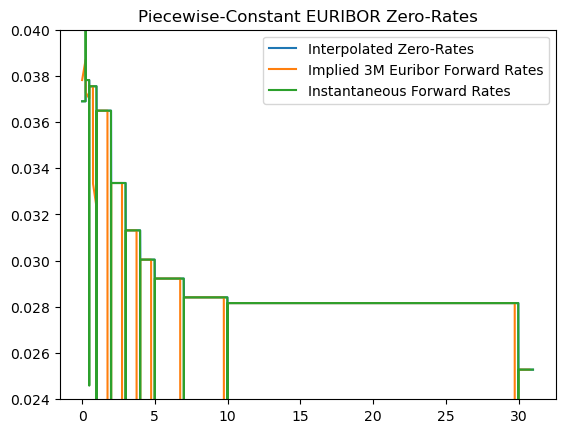

In [15]:
def inst_forward_rate(rates, time, step = 0.01):

    n = len(rates)
    inst_forward = np.zeros(int(n - 1))
    
    for i in range(len(inst_forward)):
        
        z2 = rates[i + 1]
        t2 = time[i + 1]
        
        z1 = rates[i]
        t1 = time[i]        
        
        diff = (z2 - z1) / (t2 - t1) 
        
        inst_forward[i] = rates[i] + time[i] * diff
        
    return inst_forward

x, y = piecewise_constant_interpolation(tenor, zero_rates)
fr = forward_rate(y, x, 0.25) #3m EURIBOR Rate
inst_f = inst_forward_rate(y, x)

plt.plot(x,y, label = 'Interpolated Zero-Rates')
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.plot(x[:-1], inst_f, label = 'Instantaneous Forward Rates')
plt.ylim(0.024, 0.04)
plt.title('Piecewise-Constant EURIBOR Zero-Rates')
plt.legend()

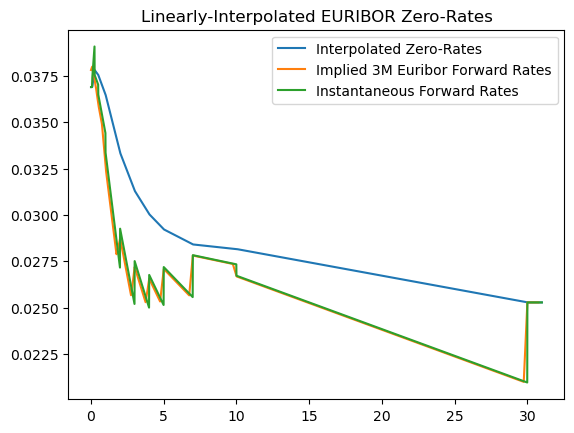

In [16]:
x, y = linear_interpolation(tenor, zero_rates)
fr = forward_rate(y, x, 0.25) #3m EURIBOR Rate
inst_f = inst_forward_rate(y, x)

plt.plot(x,y, label = 'Interpolated Zero-Rates')
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.plot(x[:-1], inst_f, label = 'Instantaneous Forward Rates')
plt.title('Linearly-Interpolated EURIBOR Zero-Rates')
plt.legend()

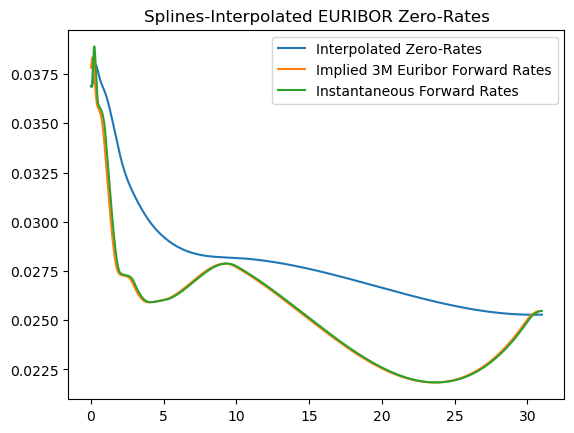

In [17]:
x, y = natural_cubic_spline_interpolation(tenor, zero_rates)
fr = forward_rate(y, x, 0.25) #3m EURIBOR Rate
inst_f = inst_forward_rate(y, x)

plt.plot(x,y, label = 'Interpolated Zero-Rates')
plt.plot(x[:-int(dt / step)],fr, label = 'Implied 3M Euribor Forward Rates')
plt.plot(x[:-1], inst_f, label = 'Instantaneous Forward Rates')
plt.title('Splines-Interpolated EURIBOR Zero-Rates')
plt.legend()

As the Zero-Rates are decreasing, it is expected that the Forward Curve will mostly lie under the RFRs, given the negative first-order derivative. Conversely for increasing rates, the Forward Curve will lie above it.  

### Stability of Implied Forward Rate

The Stability of the Instantaneous Forward Rate is a metric to study the sensitivity in relation to the Interpolation of the Zero-Rates from which it is constructed. We want to determine what is the maximum change (per bps) of the Forward Curve relative to change in bps-change in Zero-Rates. Numerically, the quantity of interest here is 

$$\dfrac{\partial f_\tau}{\partial r_\tau} \approx \dfrac{\Delta f(\tau)}{r(\tau) \pm 0.0001}$$

This of course is dependant on the Time-to-Maturity $\tau$. For quoted Tenor $\tau_k$, the Risk-Free Rate is perturbed by a basis-point $r_{new}(\tau_k) = r_{original}(\tau_k)\pm 0.0001$ and re-interpolated in order to observe it's effects on the overall system. 

In [18]:
zero_rates = eur_rates[-1] / 100
print(f'The EURIBOR Zero-Rates for Spot-Date {spot_t0[-1]} are {zero_rates}')
#print(zero_rates.shape)
tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])

#Extend zero rates and padding intervals to periods
t_max = 31
zero_rates = np.insert(zero_rates, 0, zero_rates[0])
tenor = np.insert(tenor,0,0)

zero_rates = np.insert(zero_rates, len(zero_rates), zero_rates[-1])
tenor = np.insert(tenor,len(tenor),t_max)

The EURIBOR Zero-Rates for Spot-Date 2024-06-03 are [0.0369    0.03782   0.03755   0.0364935 0.0333625 0.031312  0.0300455
 0.029226  0.028412  0.028164  0.0252835]


In [19]:
def stability(tenor, zero_rates, tau = 1, xmin = 0, 
              xmax = t_max, ymin = -100, ymax = 100, pm = 'plus'):
    #tau must take the value of a tenor
    
    ind = np.where(tenor == tau)
    
    d_zeros = zero_rates.copy()
    if pm == 'plus':
        d_zeros[ind] = d_zeros[ind] + 0.0001
    elif pm == 'minus':
        d_zeros[ind] = d_zeros[ind] - 0.0001
    
    x_const, y_const = piecewise_constant_interpolation(tenor, zero_rates)
    f_const_old = inst_forward_rate(y_const, x_const)    
    x_const, y_const = piecewise_constant_interpolation(tenor, d_zeros)
    f_const_new = inst_forward_rate(y_const, x_const)    
    
    x_lin, y_lin = linear_interpolation(tenor, zero_rates)
    f_lin_old = inst_forward_rate(y_lin, x_lin)
    x_lin, y_lin = linear_interpolation(tenor, d_zeros)
    f_lin_new = inst_forward_rate(y_lin, x_lin)    

    x_spline, y_spline = natural_cubic_spline_interpolation(tenor, zero_rates)
    f_spline_old = inst_forward_rate(y_spline, x_spline)
    x_spline, y_spline = natural_cubic_spline_interpolation(tenor, d_zeros)
    f_spline_new = inst_forward_rate(y_spline, x_spline)    

    df_const = (f_const_new - f_const_old) / 0.0001 #Convert to bps change
    df_lin = (f_lin_new - f_lin_old) / 0.0001 #Convert to bps change
    df_spline = (f_spline_new - f_spline_old) / 0.0001 #Convert to bps change
    
    plt.figure()
    plt.plot(x[:-1], df_const, label='Piecewise-Constant')
    plt.plot(x[:-1], df_lin, label = 'Linear')
    plt.plot(x[:-1], df_spline, label = 'Splines')
    if pm == 'plus':
        plt.title(f'+1bps Zero-Rate Perturbation at Tenor $=$ {tau}')
    elif pm == 'minus':
        plt.title(f'-1bps Zero-Rate Perturbation at Tenor $=$ {tau}')
    plt.legend()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel('$\Delta f_t$ in bps')
    plt.xlabel('Time in Years')


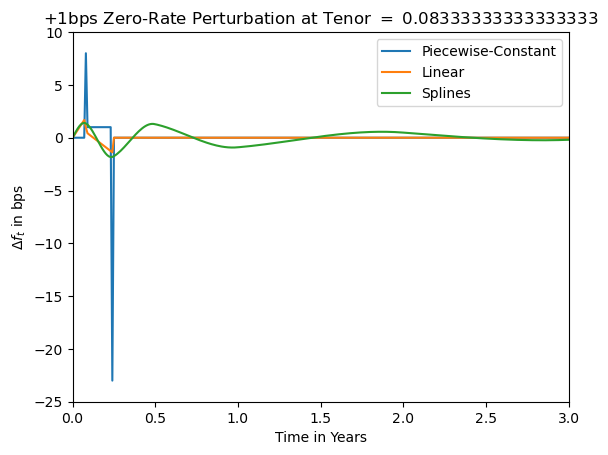

In [20]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[1], xmin = 0, 
              xmax = 3, ymin = -25, ymax = 10, pm = 'plus')

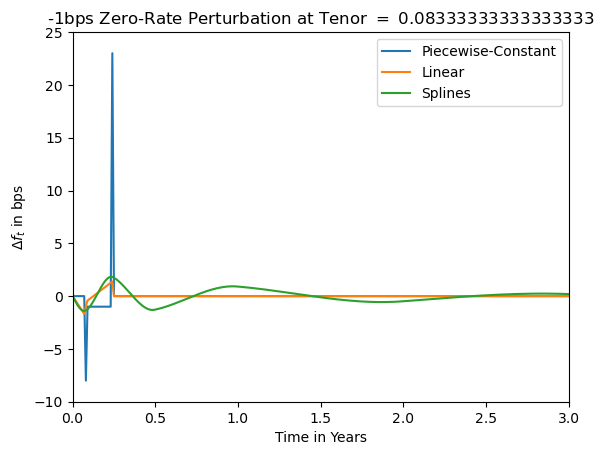

In [21]:
stability(tenor, zero_rates, tau = tenor[1], xmin = 0, 
              xmax = 3, ymin = -10, ymax = 25, pm = 'minus')

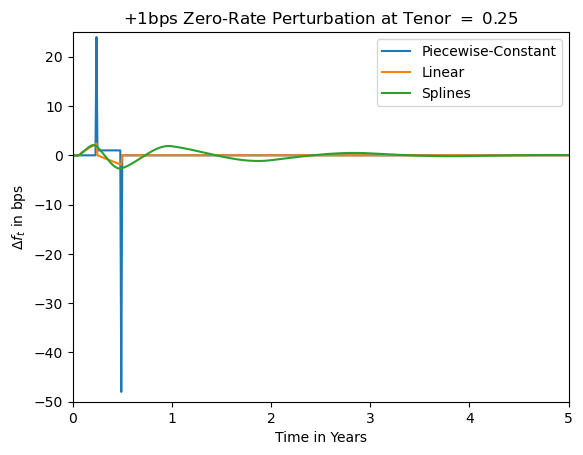

In [22]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[2], xmin = 0, 
              xmax = 5, ymin = -50, ymax = 25, pm = 'plus')

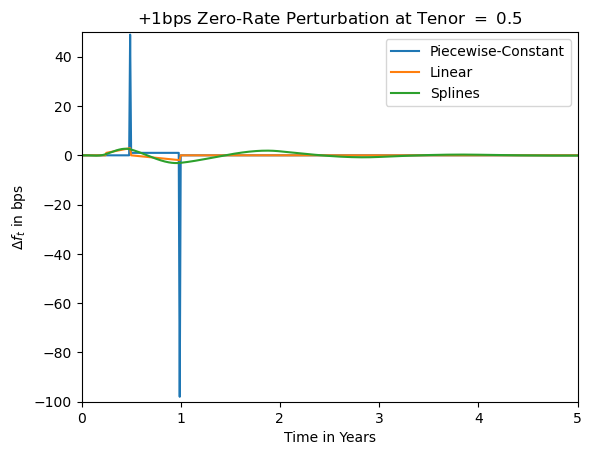

In [23]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[3], xmin = 0, 
              xmax = 5, ymin = -100, ymax = 50, pm = 'plus')

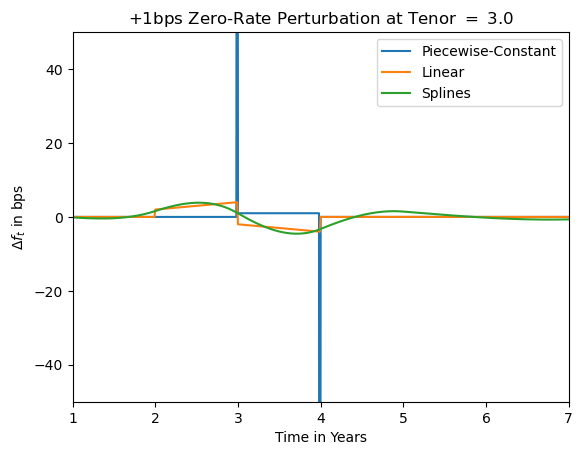

In [24]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[6], xmin = 1, 
              xmax = 7, ymin = -50, ymax = 50, pm = 'plus')

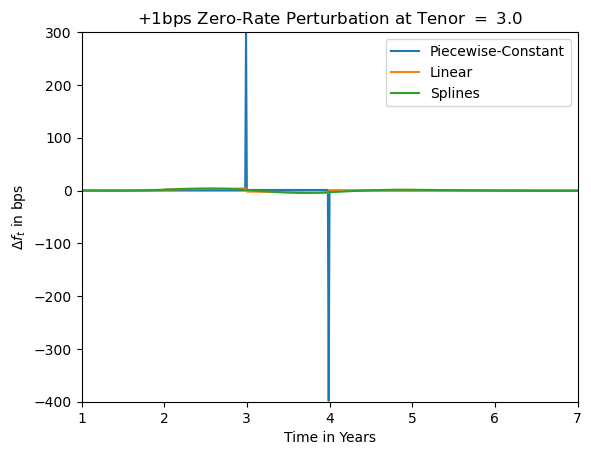

In [25]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[6], xmin = 1, 
              xmax = 7, ymin = -400, ymax = 300, pm = 'plus')

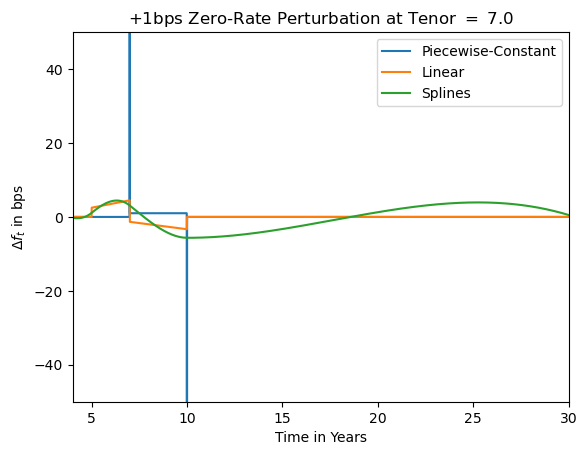

In [26]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[9], xmin = 4, 
              xmax = 30, ymin = -50, ymax = 50, pm = 'plus')

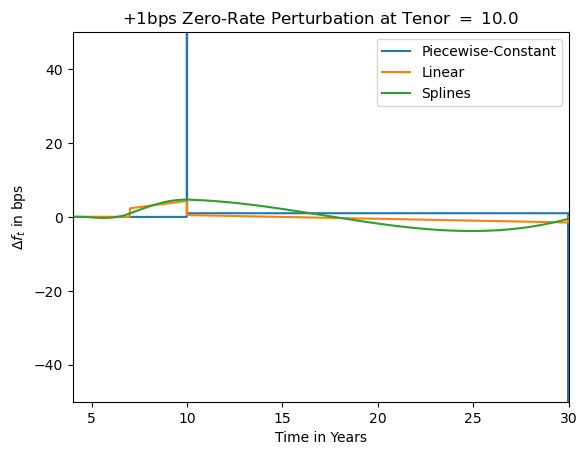

In [27]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[10], xmin = 4, 
              xmax = 30, ymin = -50, ymax = 50, pm = 'plus')

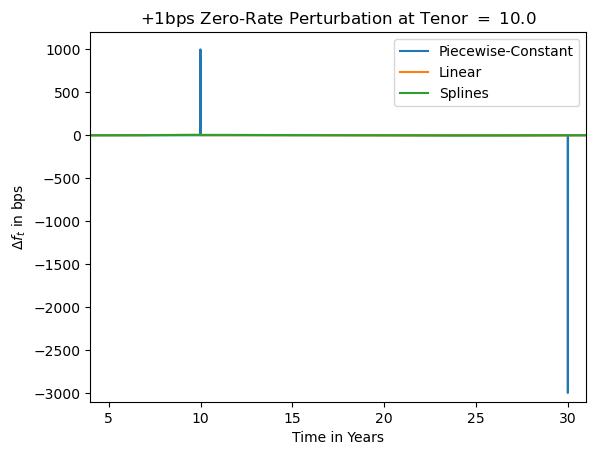

In [28]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
stability(tenor, zero_rates, tau = tenor[10], xmin = 4, 
              xmax = 31, ymin = -3100, ymax = 1200, pm = 'plus')

From the diagrams generated, the Interpolation Schemes affect the Instantaneous Forward Rate in the following ways: 

- The effect of adding vs subtracting a basis-point simply inverts the bps change on the y-axis

- For shorter Tenors, Piecewise-Constant/Linear Interpolation is prefered as the resulting change in the Forward Curve is restricted to local-neighbouring regions. Notice that the Splines propagate changes in Forwards throughout the Term-structure.

- Using a Piecewise-Constant(after) Interpolation generates the largest bps change in Forwards. This phenomenon becomes more significant with change in Rates for longer Tenors. 

- Generally for the large majority of dates, Piecewise-Constant Interpolation has the least amount of change, even compared to the Linear scheme. However, if cashflows occur at the dates on which a large change occurs, the resulting Forward Rates would change by a massive amount relative to the change in Zero-Rates. 

- Notice that for the Piecewise-Constant scheme, the dramatic changes in Implied Forward Rates occur at the Tenor points. Given that the (AFTER) Piecewise-Constant scheme is implemented, the spikes happen at $\tau_k$ and $\tau_{k+1}$. This makes sense intuitively given how the Instantaneous Forward Rate is calculated. If we take this into account when performing Piecewise-Constant Interpolation, this can be easily overcome. 

- When Rates change on longer Tenors, the Splines Interpolation generates waves and fluctuations in the Forward Curves. This is an undesirable property. Other smoothing methods may potentially minimise this phenomenon. 

- Linear Interpolation localises the Forward bps change throughout the Term-Structure, without generating a dramatic magnitude in change. It may be the preferable method to use as a change in Rates neither results in a large change of Forwards, nor affects the Forwards for various dates within the Term-Structure. 

### Locality of Implied Forward Rate

Similarly to the previous section, we want to determine what is the corresponding bps change in the Forward Rates immediately adjacent to bumped Tenor dates. The Locality of the Instantaneous Forward Rate is a metric to study the sensitivity in relation to the Interpolation Schemes. We want to determine what is the corresponding change (per bps) of the Forward Curve relative to change in Maturities for the Rates quoted. Numerically, the quantity of interest here is 

$$\dfrac{\partial f_\tau}{\partial \tau} \approx \dfrac{\Delta f(\tau)}{\tau \pm \Delta t}$$

Analogous to measuring the Stability, the quoted Zero Rate is fixed while the Tenor $\tau_k$ is perturbed by a unit interval of time, most sensibly in relation to the assumed day-count convention $\tau_k \rightarrow \tau_k \pm \dfrac{1}{360}$ and re-interpolated in order to observe it's effects on the overall system. 

In [29]:
def locality(tenor, zero_rates, tau = 1, xmin = 0, 
              xmax = t_max, ymin = -100, ymax = 100, pm = 'plus'):
    #tau must take the value of a tenor
    
    ind = np.where(tenor == tau)
    
    d_tenor = tenor.copy()
    
    if pm == 'plus':
        d_tenor[ind] = d_tenor[ind] + (1 / 360)
    elif pm == 'minus':
        d_tenor[ind] = d_tenor[ind] - (1 / 360)
    
    x_const, y_const = piecewise_constant_interpolation(tenor, zero_rates)
    f_const_old = inst_forward_rate(y_const, x_const)    
    x_const, y_const = piecewise_constant_interpolation(d_tenor, zero_rates)
    f_const_new = inst_forward_rate(y_const, x_const)    
    
    x_lin, y_lin = linear_interpolation(tenor, zero_rates)
    f_lin_old = inst_forward_rate(y_lin, x_lin)
    x_lin, y_lin = linear_interpolation(d_tenor, zero_rates)
    f_lin_new = inst_forward_rate(y_lin, x_lin)    

    x_spline, y_spline = natural_cubic_spline_interpolation(tenor, zero_rates)
    f_spline_old = inst_forward_rate(y_spline, x_spline)
    x_spline, y_spline = natural_cubic_spline_interpolation(d_tenor, zero_rates)
    f_spline_new = inst_forward_rate(y_spline, x_spline)    

    df_const = (f_const_new - f_const_old) / 0.0001 #Convert to bps change
    df_lin = (f_lin_new - f_lin_old) / 0.0001 #Convert to bps change
    df_spline = (f_spline_new - f_spline_old) / 0.0001 #Convert to bps change
    
    plt.figure()
    plt.plot(x[:-1], df_const, label='Piecewise-Constant')
    plt.plot(x[:-1], df_lin, label = 'Linear')
    plt.plot(x[:-1], df_spline, label = 'Splines')
    if pm == 'plus':
        plt.title(f'+1 day Maturity Perturbation at Tenor $=$ {tau}')
    elif pm == 'minus':
        plt.title(f'-1 day Maturity Perturbation at Tenor $=$ {tau}')
    plt.legend()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel('$\Delta f_t$ in bps')
    plt.xlabel('Time in Years')


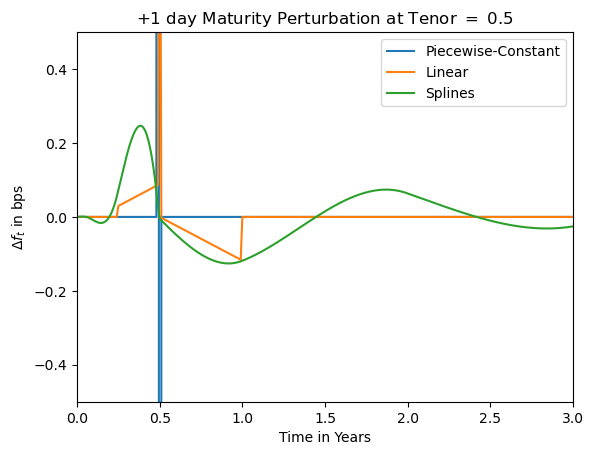

In [30]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
locality(tenor, zero_rates, tau = tenor[3], xmin = 0, 
              xmax = 3, ymin = -0.5, ymax = 0.5, pm = 'plus')

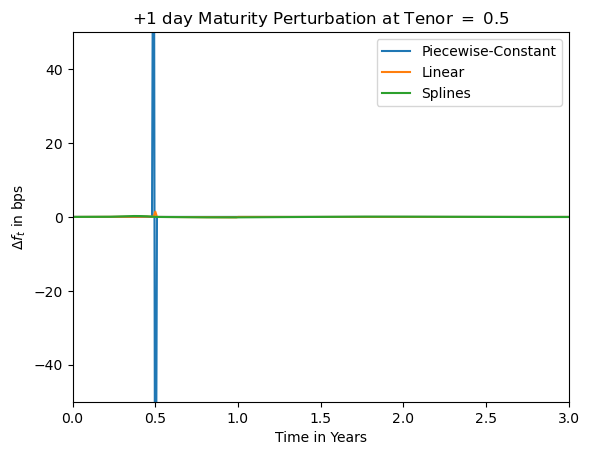

In [31]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
locality(tenor, zero_rates, tau = tenor[3], xmin = 0, 
              xmax = 3, ymin = -50, ymax = 50, pm = 'plus')

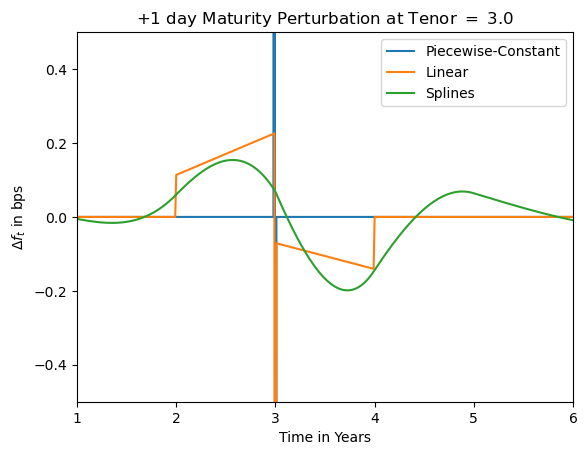

In [32]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
locality(tenor, zero_rates, tau = tenor[6], xmin = 1, 
              xmax = 6, ymin = -0.5, ymax = 0.5, pm = 'plus')

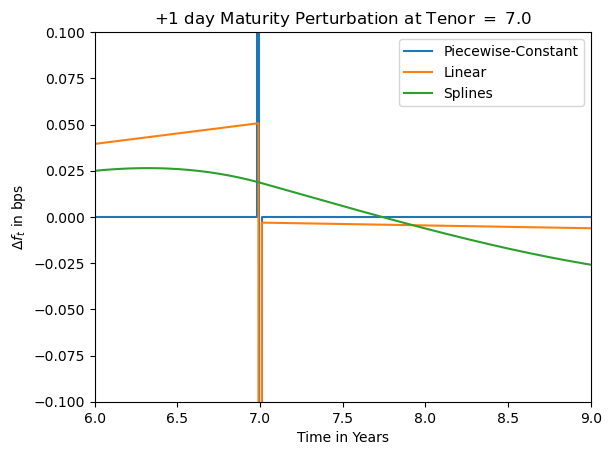

In [33]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
locality(tenor, zero_rates, tau = tenor[9], xmin = 6, 
              xmax = 9, ymin = -0.1, ymax = 0.1, pm = 'plus')

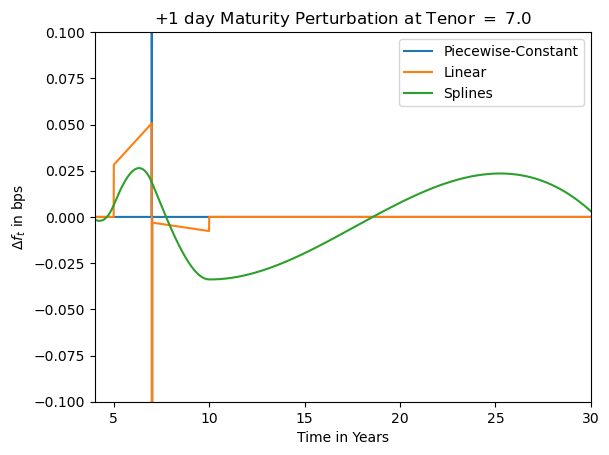

In [34]:
#tenor = np.array([30/360, 90/360, 180/360, 1, 2, 3, 4, 5, 7, 10, 30])
locality(tenor, zero_rates, tau = tenor[9], xmin = 4, 
              xmax = 30, ymin = -0.1, ymax = 0.1, pm = 'plus')

- Smoothing of the Forward Curve causes ripples throughout the Term-structure. However, with shifting increasing Maturity dates, the amplitude of the change in Forwards decrease dramatically despite the ripple effect throughout the entire Term-structure. 

- Taking Piecewise-Constant rates lead to large changes at very-nearby neighbouring regions. Hence for specific dates, this could lead to inaccurate Forward Rates for hedging/pricing. Again, this could easily be taken into account if there is information regarding the shirting of quoted rates/maturities. 

- Linear Interpolation can also lead to large relative changes in Forwards in local neighbouring regions.


### Single Currency Explicit Discount Curve

In practice, assuming a constant Risk-Free Rate $r_i$ for period $\left[ t_{i-1}, t_{i} \right]$, we have Discount Factor $P(t_{i-1}, t_i) = e^{-r_1 \; (t_i - t_{i-1})}$

$$P(t_{i-1}, t_{i}) = e^{-r_i \; (t_{i}-t_{i-1})} \; \; \; \text{with} \; \; \; P(t_0 = 0, t_1) = e^{-r_1 \; t_1}$$

Note that for increasing intervals $t_0 < t_1 < \dots < t_{n-1} < t_n$ and equivalent constant rate $r$ throughout each interval, we have that

$$ P(t_0, t_n) = \prod^{n}_{i = 0} P(t_{i-1}, t_{i}) $$

Text(0.5, 1.0, 'Explicit Discount Curve for EURIBOR on 2024-06-03')

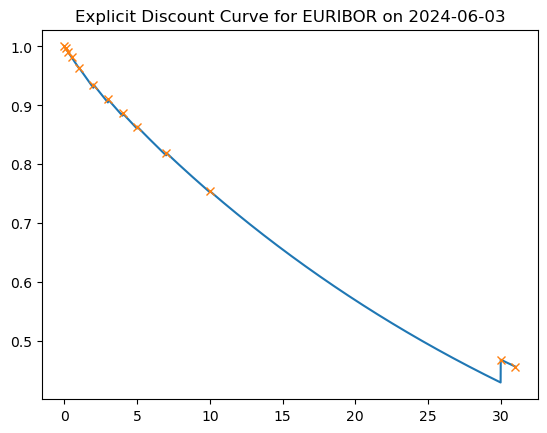

In [35]:
x, y = piecewise_constant_interpolation(tenor, zero_rates)


y = np.asarray(y)

DF = np.exp(-y * x)

plt.plot(x, DF)
plt.plot(tenor, np.exp(-zero_rates * tenor), 'x')
plt.title(f'Explicit Discount Curve for EURIBOR on {spot_t0[-1]}')